## Heart Disease Classification

This is a binary classification problem. Target Variable contains two values 1 and 0. Our target will be to achive high accuracy without loosing the recall rate. Detail of each provided features are as:
* **age** in years
* **sex**(1 = male; 0 = female)
* **cp** chest pain type
* **trestbps** resting blood pressure (in mm Hg on admission to the hospital)
* **cholserum** cholestoral in mg/dl
* **fbs**(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* **restecg** resting electrocardiographic results
* **thalach** maximum heart rate achieved
* **exang** exercise induced angina (1 = yes; 0 = no)
* **oldpeak** ST depression induced by exercise relative to rest
* **slope** the slope of the peak exercise ST segment
* **ca** number of major vessels (0-3) colored by flourosopy
* **thal** 3 = normal; 6 = fixed defect; 7 = reversable defect
* **target 1 or 0**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats # for stats 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


## Read Dataset
Provided dataset contains 13 featutes that will help to predict target value. Lets read the data and see the quality of provided data.

In [2]:
data_df = pd.read_csv("../input/heart.csv")
data_df.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
51,66,1,0,120,302,0,0,151,0,0.4,1,0,2,1
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2,1
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3,1
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
41,48,1,1,130,245,0,0,180,0,0.2,1,0,2,1


Lets fix the datatype for ordinal features. This will half the memory uses and will help in data analysis and building model.

In [3]:
def convert_to_objects(df , feature):
    return df[feature].astype('category')

for feature in ['sex','cp','fbs','restecg','exang','slope','ca','thal','target']:
    data_df[feature] = convert_to_objects(data_df, feature)
    
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null category
cp          303 non-null category
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null category
restecg     303 non-null category
thalach     303 non-null int64
exang       303 non-null category
oldpeak     303 non-null float64
slope       303 non-null category
ca          303 non-null category
thal        303 non-null category
target      303 non-null category
dtypes: category(9), float64(1), int64(4)
memory usage: 15.7 KB


Good thing there is no missing value. It is a small dataset with 303 observation. After converting ordinal features to categorical features there are 8 categorical features and 5 countinous features. Age is showing as countinous features but it require more understanding before to consider it continous or ordinal features.
### Univariable Analysis

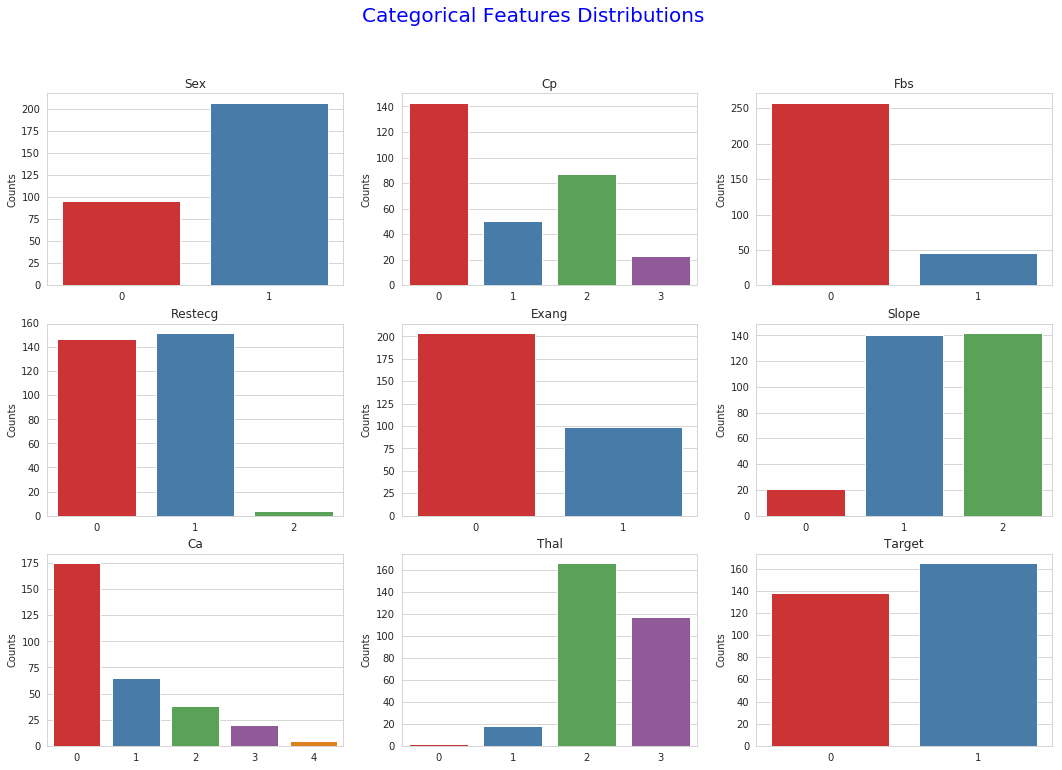

In [4]:
sns.set_palette("Set1")
sns.set_style("whitegrid")
cat_features = ['sex','cp','fbs','restecg','exang','slope','ca','thal','target']
fig,ax = plt.subplots(3,3, figsize=(18,12))
for row in range(3):
    for col in range(3):
        feature_location = row * 3 + col
        # print(cat_features[feature_location])
        sns.countplot(data= data_df, x = cat_features[feature_location], ax = ax[row][col])
        ax[row][col].set_title(cat_features[feature_location].capitalize())
        ax[row][col].set(xlabel='',ylabel='Counts')
plt.suptitle('Categorical Features Distributions',color='b',fontsize = 20);

> **Findings**:
> * Dataset has almost twice male observations
> * There are 4 chest pain type in dataset. Chest pain type 0 is most common which is followed by Chest pain type 2. The Chest Pain type 3 is least common type.
> * The Fbs is fasting blood sugar. There is majority of Non diabetics patients. Which is almost 5 fold.
> * The restecg is resting electrocardiographic results. There are almost equal number of category 0 and 1. and there are few observation for type 2
> * The exang exercise induced angina (1 = yes; 0 = no). There are more observation with exang value 0
> * The slope of the peak exercise ST segment shows there are three categories where 1 and 2 have almost same number of observation and type 0 has very low numbers.
> * ca number of major vessels (0-3) colored by flourosopy. vessels type 0 is most common.
> * thal 3 = normal; 6 = fixed defect; 7 = reversable defect. This looks bit confusing.As per data description there are 3 category 3, 6, and 7 but dataset has 0 to 3. The 2 is most common type.
> * target1 or 0. There are almost equal number of observation for both the classes. it can be considered as balance dataset


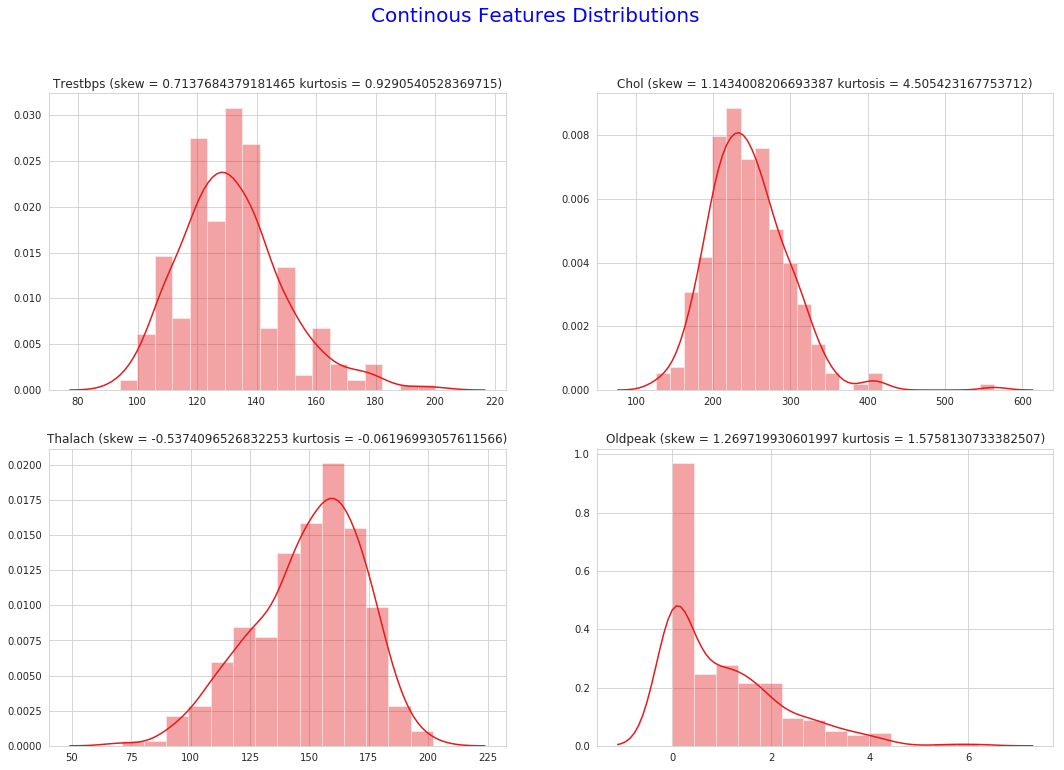

In [5]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
num_features = ['trestbps','chol','thalach','oldpeak']
def continuous_variables_plot(num_features):  
    fig,ax = plt.subplots(2,2, figsize=(18,12))
    for row in range(2):
        for col in range(2):
            feature_location = row * 2 + col
            # print(cat_features[feature_location])
            sns.distplot(data_df[num_features[feature_location]], ax = ax[row][col])
            ax[row][col].set_title(
                '{} (skew = {} kurtosis = {})'.format(
                    num_features[feature_location].capitalize(),
                    data_df[num_features[feature_location]].skew(),
                    data_df[num_features[feature_location]].kurtosis()
                ))
            ax[row][col].set(xlabel='')
            #ax[row][col].annotate('actual group', xy=(100,200), xytext=(100, 300))
    plt.suptitle('Continous Features Distributions',color='b',fontsize = 20);
    
continuous_variables_plot(num_features)

>As per Wikipedia, "In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive or negative, or undefined"

> Continuous variables are skewed. Let them normalized first

> **Left Skewed** - thalach

> **Right Skewed** - trestbps,chol,oldpeak

#### Fix Skewness of the data

In [6]:
data_df['chol'] = data_df.apply(lambda row: 420 if (row['chol'] > 420) 
                                else row['chol'],axis = 1)
data_df['oldpeak'] = data_df.apply(lambda row: 0.01 if (row['oldpeak'] <= 0) 
                                   else row['oldpeak'],axis = 1)
data_df['trestbps'] = data_df.apply(lambda row: 165 if (row['trestbps'] > 165) 
                                   else row['trestbps'],axis = 1)

data_df['xt_thalach'], t_thalach = stats.boxcox(data_df['thalach'])
data_df['xt_chol'], t_chol = stats.boxcox(data_df['chol'])
data_df['xt_oldpeak'], t_oldpeak = stats.boxcox(data_df['oldpeak'])
data_df['xt_trestbps'], t_trestbps = stats.boxcox(data_df['trestbps'])
#data_df.drop(num_features,axis=1,inplace=True)

#### Post fix Skewness test

In [7]:
def skew_test(feature):
    stat, pvalue = stats.skewtest(data_df[feature])
    if pvalue > 0.05:
        print('{} - Not Skewed Feature  p-value -{:.4} skewness {:.4}'.format(feature,pvalue,stat))
    else:
        print('{} - Skewed feature : p-value{:.4} skewness - {:.4}'.format(feature,pvalue,stat))

skew_test('xt_thalach')
skew_test('xt_chol')
skew_test('xt_trestbps')
skew_test('xt_oldpeak')

xt_thalach - Not Skewed Feature  p-value -0.5862 skewness -0.5444
xt_chol - Not Skewed Feature  p-value -0.9882 skewness 0.01475
xt_trestbps - Not Skewed Feature  p-value -0.9908 skewness -0.01148
xt_oldpeak - Not Skewed Feature  p-value -0.07468 skewness -1.782


#### Bucketing Age feature

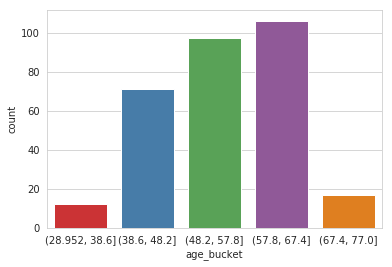

In [8]:
data_df['age_bucket'] = pd.cut(data_df['age'],bins=5)
sns.countplot(data_df['age_bucket']);
# data_df['age'].hist();

### Bi-variable Analysis

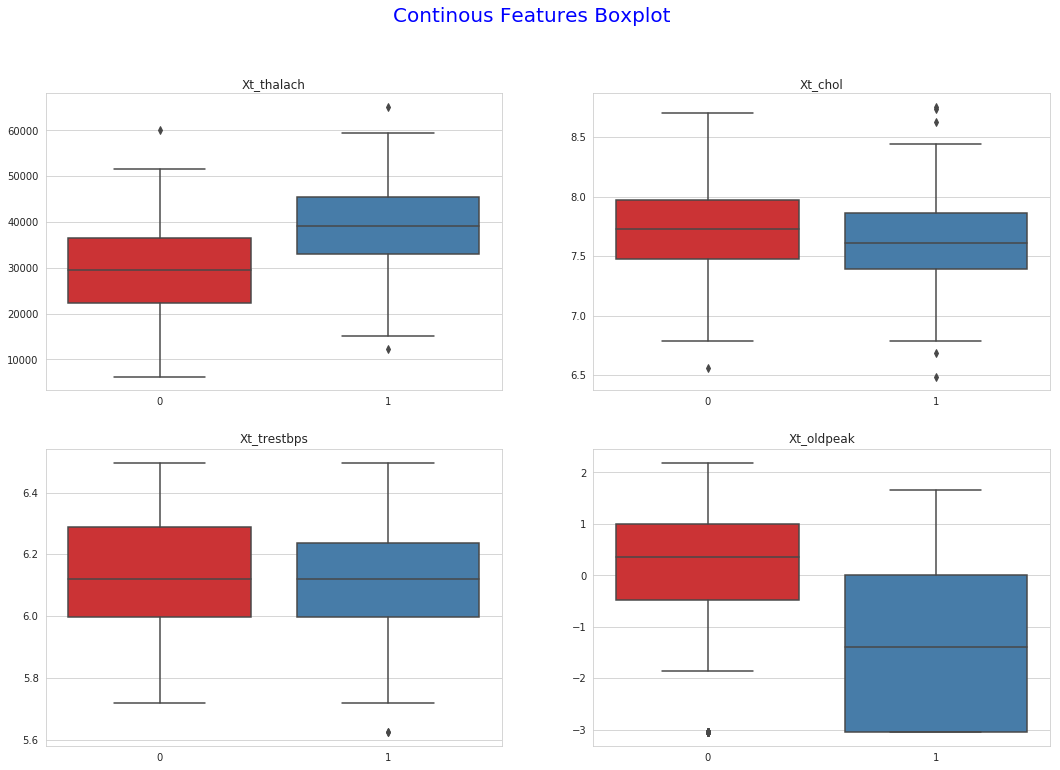

In [9]:
num_features = ['xt_thalach','xt_chol','xt_trestbps','xt_oldpeak']
def continuous_variables_boxplot(num_features):  
    fig,ax = plt.subplots(2,2, figsize=(18,12))
    for row in range(2):
        for col in range(2):
            feature_location = row * 2 + col
            # print(cat_features[feature_location])
            sns.boxplot(data=data_df, y = data_df[num_features[feature_location]],x='target',
                        ax = ax[row][col])
            ax[row][col].set_title(num_features[feature_location].capitalize())
            ax[row][col].set(xlabel='',ylabel='')
            #ax[row][col].annotate('actual group', xy=(100,200), xytext=(100, 300))
    plt.suptitle('Continous Features Boxplot',color='b',fontsize = 20);

continuous_variables_boxplot(num_features)

Seems threstbps does not have much difference.This can be considered for removal in later stage

#### Features Association Test

In [10]:
def feature_independent(feature):
    chi2, p , dof, expected = stats.chi2_contingency(pd.crosstab(data_df['target'],data_df[feature]))
    #print("feature : {}".format(feature))
    #print('Chi : {:.4}\np-value :{:.4} \nDOF :{}'.format(chi2,p,dof))
    print(
        '{} is not associated. p-value {}'.format(feature,p)) if p > 0.05 else print(
        '{} is associated.  p-value {}'.format(feature,p))
    print('_'*55)
        
for feature in ['sex','cp','fbs','restecg','exang','slope','ca','thal']:
    feature_independent(feature)

sex is associated.  p-value 1.8767776216941532e-06
_______________________________________________________
cp is associated.  p-value 1.3343043373050064e-17
_______________________________________________________
fbs is not associated. p-value 0.7444281114149577
_______________________________________________________
restecg is associated.  p-value 0.006660598773498031
_______________________________________________________
exang is associated.  p-value 7.454409331235655e-14
_______________________________________________________
slope is associated.  p-value 4.8306819342768186e-11
_______________________________________________________
ca is associated.  p-value 2.7124702119593116e-15
_______________________________________________________
thal is associated.  p-value 2.233350721012921e-18
_______________________________________________________


Seems fps is not associated with the target.

#### One Hot Coding

In [11]:
age_dummies = pd.get_dummies(data_df['age_bucket'],drop_first=True,prefix="age")
cp_dummies = pd.get_dummies(data_df['cp'],drop_first=True,prefix="cp")
ca_dummies = pd.get_dummies(data_df['ca'],drop_first=True,prefix="ca")
slope_dummies = pd.get_dummies(data_df.slope,drop_first=True,prefix="slope")
thal_dummies = pd.get_dummies(data_df.thal,drop_first=True,prefix="thal")
restecg_dummies = pd.get_dummies(data_df.restecg,drop_first=True,prefix="restecg")
data = pd.concat([age_dummies,cp_dummies,ca_dummies,slope_dummies,
           thal_dummies,restecg_dummies,data_df[num_features],data_df['target']],axis = 1)

#### Standard Scale Preprocessing &  train and test dataset split

In [12]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
scale = preprocessing.StandardScaler()
data['xt_chol'] = scale.fit_transform(data['xt_chol'].values.reshape(-1, 1))
data['xt_thalach'] = scale.fit_transform(data['xt_thalach'].values.reshape(-1, 1))
data['xt_trestbps'] = scale.fit_transform(data['xt_trestbps'].values.reshape(-1, 1))
data['xt_oldpeak'] = scale.fit_transform(data['xt_oldpeak'].values.reshape(-1, 1))

X = data.iloc[:,0:-1]
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 42)

In [13]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

Mean Score: 0.811	 Std Deviation: 0.062
Precision Score: 0.832 	 Recall Score: 0.817


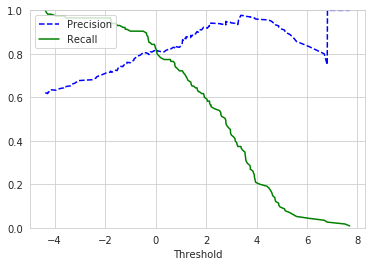

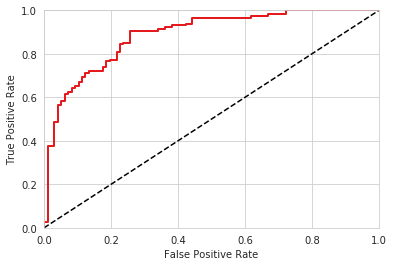

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,recall_score, precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

lr = LogisticRegression(solver='liblinear', random_state=42, C=25, max_iter=50)
lr_cvs = cross_val_score(lr, X_train, y_train, cv=5)
print('Mean Score: {:.3}\t Std Deviation: {:.3}'.format(lr_cvs.mean(), lr_cvs.std()))
lr_predict_train = cross_val_predict(lr,X_train, y_train, cv=5)
print('Precision Score: {:.3} \t Recall Score: {:.3f}'.format(precision_score(y_train,lr_predict_train),
                                                         recall_score(y_train,lr_predict_train)))



y_scores = cross_val_predict(lr,X= X_train,y = y_train, cv = 3,method='decision_function')
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
plot_roc_curve(fpr, tpr)
plt.show()
# lr.fit(X_train, y_train)
# lr_predict = lr.predict(X_test)
# lr_cm = confusion_matrix(y_test,lr_predict )
# print(classification_report(y_test,lr_predict))
# print('ROC AUC Score :{:.3}'.format(roc_auc_score(y_test,lr_predict)))

Why the precision curve is not smooth? Why it suddenly dropping after threshold 3.5. On the other hand recall in smoothly descresing with threshold value increasing. Since our purpose to get the balance model which is good in precision and recall both.Threshold value 0 looks good which is giving approx 81% recall and 83% precision.